# 1. Introduction

- Nama : Hedy Fernando
- Data-set : Interview Tasks for Data Analyst .xlsx
- Objective : Mengetahui ketercapaian komptenesi murid dan kompetensi yang perlu dilakukan evaluasi

Alur Kerja:
1. Membuat Objective dari rumusah masalah
2. Analisa kolom dari data
3. Melihat data secara statistik dasar (Mean,Median,Min,Max)
4. Mencari tahu jumlah murid dan persentase murid dari setiap kompetensi
5. Menentukan Standard Kelulusan dan menambah kolom kelulusan
6. Melihat Distribusi Data Competency Score
7. Melihat Persentase Kelulusan
8. Melihat Persentase kelulusan dari setiap Kompetensi
9. Memberikan Kesimpulan

Informasi yang perlu diketahui:
- Menentukan skor kelulusan
- Kompetensi yang paling banyak memiliki skor rendah
- persentase kelulusan dari setiap kompetensi

Kita akan mengasumsikan skor kelulusan minimal di skor 79. Nilai ini hanya asumsi dikarenakan dari distribusi data, rata-rata skor murid di angka 85 dan kebanyakan data skor berada di atas nilai 80.
- Skor kelulusan = 79

# 2. Import Library

In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warningsetting 
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [2]:
# Membaca file excel
student_s = pd.read_excel('Interview Tasks for Data Analyst .xlsx', sheet_name=0)
registration_d = pd.read_excel('Interview Tasks for Data Analyst .xlsx', sheet_name=1)
transaction_d = pd.read_excel('Interview Tasks for Data Analyst .xlsx', sheet_name=2)

## Task 1

In [3]:
student_s.shape

(1575, 3)

In [4]:
# Student Score - 5 data ter-atas
student_s.head()

,Student ID,Competency Name,Competency Score
0,1089,Berkomitmen,100.0
1,1089,Reflektif,100.0
2,1089,Mandiri,100.0
3,1089,Berdaya,100.0
4,1089,Inovatif,100.0


In [5]:
# Student Score - 5 data ter-bawah
student_s.tail()

,Student ID,Competency Name,Competency Score
1570,902545,Berkomitmen,85.671642
1571,908822,Mandiri,35.000000
1572,908822,Berkomitmen,60.000000
1573,908822,Berdaya,60.000000
1574,908822,Cerdas,69.666667


Dari data-set Student Score diketahui bahwa data-set berisi kumpulan murid yang mengikuti berbagai jenis kompetensi dan skor yang didapatkan dari kompetensi yang diikuti. Bisa dilihat bahwa ada murid yang mengikuti lebih dari satu jenis kompetensi.

In [6]:
# Student Score info data
student_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student ID        1575 non-null   int64  
 1   Competency Name   1575 non-null   object 
 2   Competency Score  1575 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.0+ KB


Tidak terdapat data yang kosong pada data-set.

In [7]:
student_s.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,1575.0,356682.003175,156107.471095,174.0,217958.000000,389305.000000,418188.000000,908822.0
Competency Score,1575.0,85.833331,13.877727,6.0,79.824635,88.662719,96.237001,100.0


- Jumlah data keseluruhan ada 1575 record
- Rata-rata nilai kompetensi di angka 85
- Nilai minimal skor di angka 6 dan maksimal skor di angka 100

In [8]:
student_s.duplicated().sum()

0

In [9]:
# Jumlah murid yang mengikuti kompetensi
student_s['Student ID'].nunique()

254

Ada 254 murid yang tercatat telah mengikuti kompetensi.

In [10]:
# Jenis kompetensi yang terdaftar
student_s['Competency Name'].unique()

array(['Berkomitmen', 'Reflektif', 'Mandiri', 'Berdaya', 'Inovatif',
       'Cerdas', 'Bekerja sama', 'Komunikatif', 'Berprinsip'],
      dtype=object)

Terdapat 9 jenis kompetensi pada data-set yang telah diikuti murid.

In [192]:
# Total murid di setiap Kompetensi
student_s['Competency Name'].value_counts()

Competency Name
Cerdas          233
Berdaya         208
Mandiri         201
Inovatif        199
Komunikatif     177
Berkomitmen     157
Reflektif       141
Berprinsip      137
Bekerja sama    122
Name: count, dtype: int64

Jumlah murid yang mengikuti kompetensi Cerdas adalah yang terbanyak sedangkan kompetensi Bekerja Sama adalah yang paling sedikit diikuti oleh murid dari keseluruhan murid yang berjumlah 254.

In [193]:
# Persentase murid di setiap kompetensi dari keseluruhan murid

per_mur = student_s['Competency Name'].value_counts() /254 *100
per_mur

Competency Name
Cerdas          91.732283
Berdaya         81.889764
Mandiri         79.133858
Inovatif        78.346457
Komunikatif     69.685039
Berkomitmen     61.811024
Reflektif       55.511811
Berprinsip      53.937008
Bekerja sama    48.031496
Name: count, dtype: float64

Jika kita lihat secara persentase, jumlah murid yang mengikuti kompetensi Bekerja Sama ada di bawah 50% dari keseluruhan murid yang terdaftar. Tim akademik harus melakukan evaluasi kembali kenapa beberapa kompetensi seperti Bekerja Sama dan Berprinsip memiliki murid yang sedikit. Bisa terjadi karena kurangnnya minat murid pada kompetensi tertentu karena kurang menarik dari kompetensi yang lain, tim akademik bisa memberikan paket belajar yang include dengan kompentensi yang kurang diminati, misal paket Cerdas dan Berprinsip. Kita akan lihat lebih lanjut, apakah tingkat kesusahan soal mempengaruhi kurangnnya minat murid mengikuti beberapa kompetensi.

In [12]:
# Membuat kolom baru untuk kelulusan murid
student_s['Passed'] = student_s['Competency Score'] >= 79
student_s['Passed']

0        True
1        True
2        True
3        True
4        True
        ...  
1570     True
1571    False
1572    False
1573    False
1574    False
Name: Passed, Length: 1575, dtype: bool

In [13]:
# Menandakan murid dengan skor di atas 78 dengan predikat Lulus
student_s['Passed'].loc[student_s['Passed'] == True] = 'Lulus'
student_s['Passed'].loc[student_s['Passed'] == False] = 'Tidak Lulus'
student_s.head()

,Student ID,Competency Name,Competency Score,Passed
0,1089,Berkomitmen,100.0,Lulus
1,1089,Reflektif,100.0,Lulus
2,1089,Mandiri,100.0,Lulus
3,1089,Berdaya,100.0,Lulus
4,1089,Inovatif,100.0,Lulus


# 4 EDA (Exploratory Data Analysis)

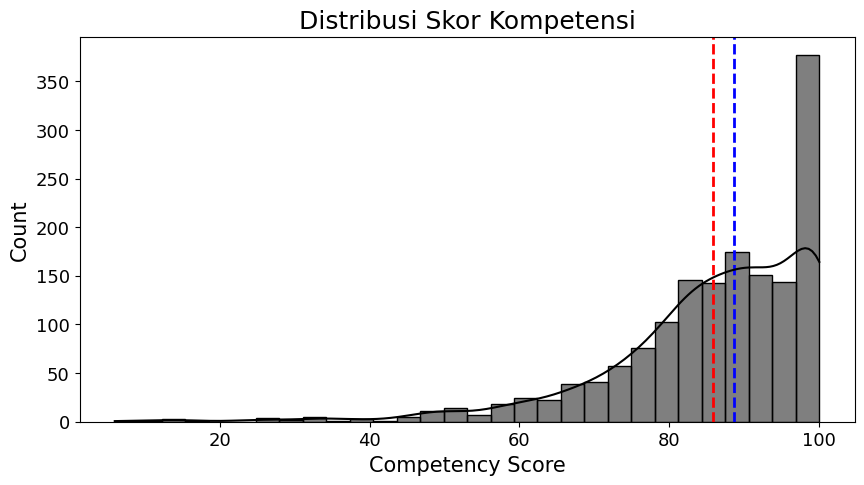

In [61]:
plt.figure(figsize=(10, 5))
plt.axvline(student_s['Competency Score'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(student_s['Competency Score'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.title('Distribusi Skor Kompetensi')
sns.histplot(student_s['Competency Score'], bins=30, kde=True, color='black')
plt.show()

Grafik di atas menginformasikan bahwa distribusi skor banyak berada di nilai 100 dan skor yang berada di bawah 80 sangatlah sedikit. Kita harus mencari tahu kebanyakan murid yang memiliki skor di bawah 80 dan di atas 80 ada di kompetensi yang mana.

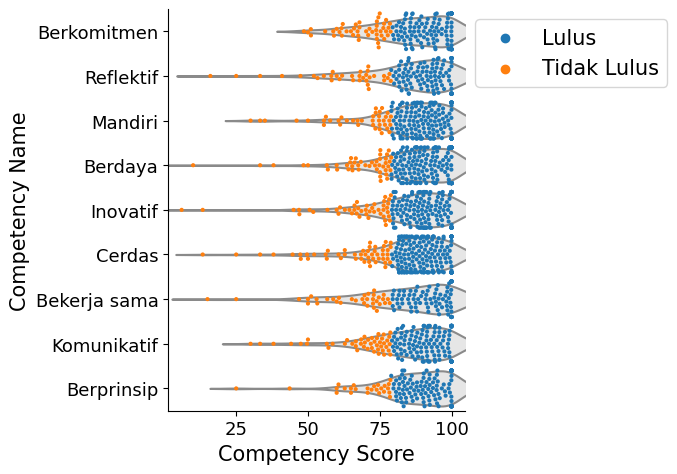

In [183]:
sns.catplot(data=student_s, x="Competency Score", y="Competency Name", kind="violin", color=".9", inner=None)
sns.swarmplot(data=student_s, x="Competency Score", y="Competency Name", hue='Passed', size=3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Jika kita lihat dari persebaran data dari setiap kompetensi, kita bisa menyimpulkan bahwa terkonfirmasi data skor mulai melebar volumennya di atas nilai 75.

- Kompetensi yang memiliki skor sangat rendah ada di kompetensi: Reflektif, Berdaya, Inovatif, Cerdas dan Bekerja Sama. 
- Jika kita tinjau dari standard kelulusan, persebaran yang Tidak Lulus dan terlihat volumennya cukup tebal ada di kompetensi Komunikatif, Cerdas, Inovatif, Berkomitmen dan Berdaya. 
    
Tapi perlu kita dalami terlebih dahulu karena adanya ketidakseimbangan jumlah murid dan analisa masih berdasarkan dari gambar persebaran data. Apakah kompetensi yang disebutkan perlu dilakukan sebuah evaluasi atau tidak.

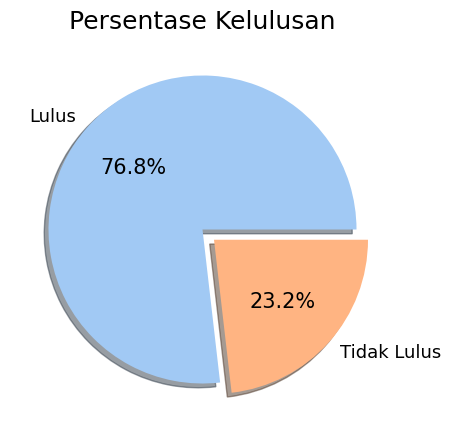

In [135]:
plt.figure(figsize=(5,5))
plt.title('Persentase Kelulusan')

colors = sns.color_palette('pastel')
labels = student_s['Passed'].unique()
explode = (0, 0.1)

plt.pie(student_s['Passed'].value_counts(),colors=colors,labels=labels, explode=explode, 
        autopct='%.1f%%', shadow=True)
plt.show()

Persentase kelulusan dari keseluruhan kompetensi masih terbilang cukup baik yaitu 76% berhasil Lulus. Hanya 23% yang gagal memenuhi standard kelulusan, kita akan cari tahu dari kompetensi mana yang menyumbang jumlah Tidak Lulus terbanyak.

Passed
Lulus          1210
Tidak Lulus     365
Name: count, dtype: int64

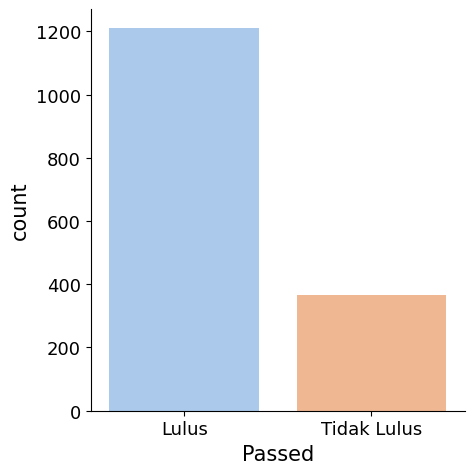

In [144]:
sns.catplot(x='Passed',kind='count',data=student_s,palette='pastel')
student_s['Passed'].value_counts()

Jika dilihat dari barplot, 23% yang tidak lulus berjumlah 365 kompetensi yang sudah berjalan. Jumlahnnya sangat sedikit jika dibandingkan dengan jumlah yang lulus yaitu 1210.

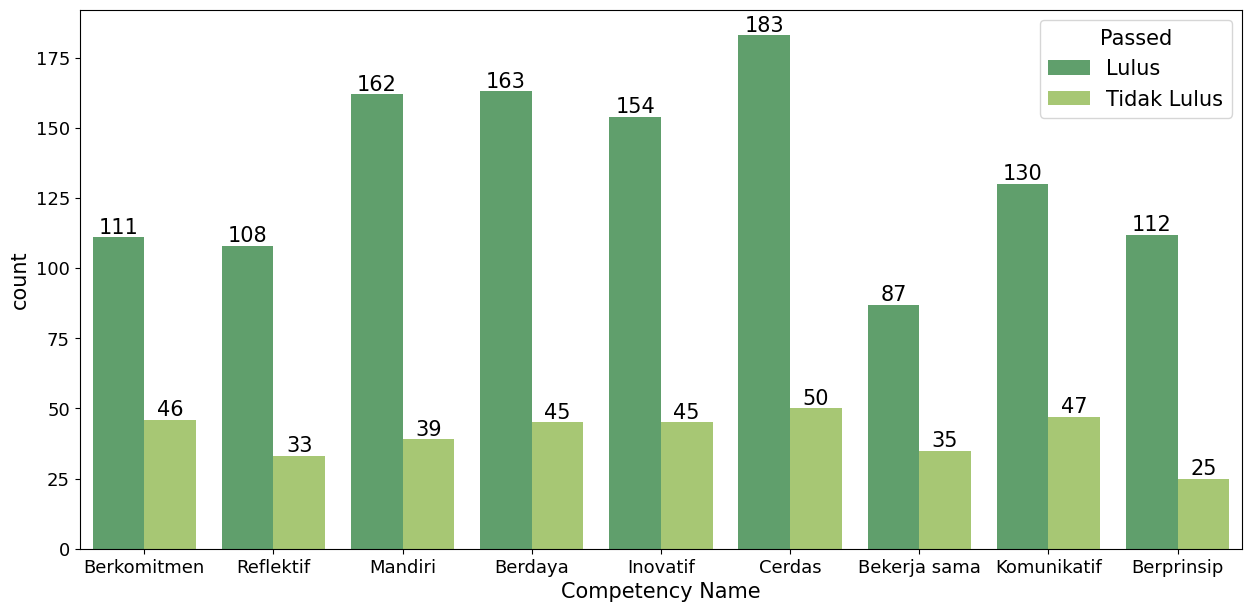

In [131]:
plt.figure(figsize=(15,7))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'font.size': 15})
ax = sns.countplot(data=student_s, x=student_s['Competency Name'], hue='Passed', palette='summer')
for i in ax.containers:
    ax.bar_label(i,)

Dari jumlah murid yang tidak lulus, terbanyak ada di kompetensi Cerdas yaitu 50. Tetapi perlu diingat bahwa jumlah murid yang mengikuti kompetensi Cerdas merupakan yang terbanyak. Kompetensi Bekerja Sama walaupun jumlah yang tidak lulus lebih sedikit tapi jumlah murid yang mengikuti kompetensi tersebut juga sangat sedikit, kompetensi ini bisa dibilang cukup memiliki murid yang tidak lulus cukup banyak. Tapi dari jumlah murid yang memiliki jumlah kelulusan sedikit yaitu kompetensi Bekerja Sama, Reflektif, Berkomitmen dan Berprinsip.

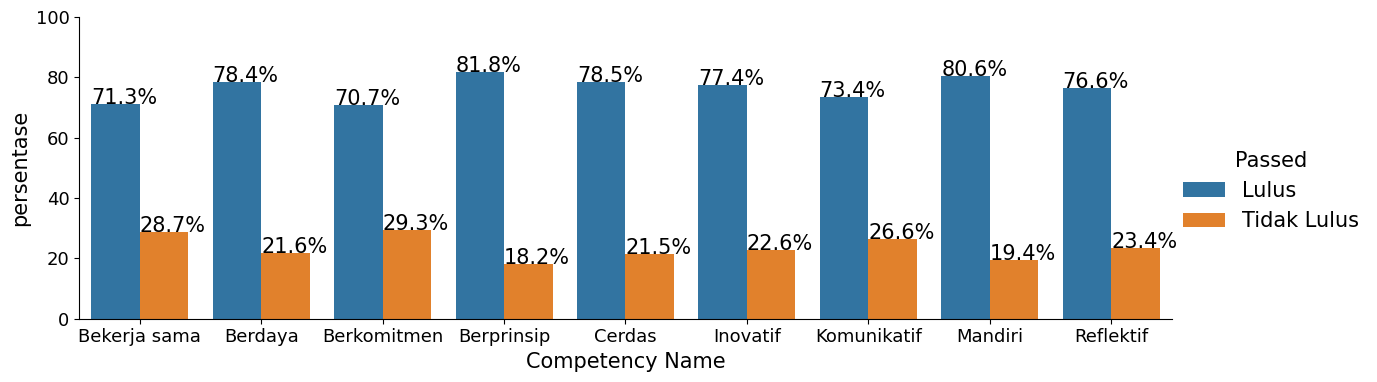

In [199]:
x,y = 'Competency Name', 'Passed'

df1 = student_s.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('persentase').reset_index()

g = sns.catplot(x=x,y='persentase',hue=y,kind='bar',data=df1,height=4, aspect=3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Dari hasil persentase kompetensi Mandiri dan Berprinsip merupakan kompetensi yang memiliki persentase lulus hingga 80%. Sedangkan Bekerja Sama, Berkomitmen dan Komunikatif memiliki jumlah murid tidak lulus yang cukup tinggi yaitu di atas 25%.

# 5. Kesimpulan

Dari hasil analisa menyeluruh, kita ketahui Kompetensi Mandiri dan Berprinsip merupakan kompetensi yang memiliki persentase kelulusan hingga 80%. Beberapa kompetensi lain juga sudah memiliki tingkat kelulusan di atas 75%. Persentase ini cukup tinggi dan sudah terbilang baik. Tetapi untuk kompetensi Berkomitmen, Bekerja Sama dan Komunikatif walalupun masih di atas 70% tingkat kelulusan, kompetensi ini merupakan yang terkecil persentase kelulusannya. Kita bisa lakukan evaluasi apakah soal yang disediakan masih terbilang susah untuk murid-murid atau bahkan ada murid yang tidak menyelesaikan uji kompetensinnya hingga selesai sehingga membuat mereka tidak lulus.Kita juga bisa meminta feedback atau memberikan layanan konsultasi untuk para murid agar bisa lebih mengetahui kendala yang dihadapi murid. Beberapa hal juga yang harus diperhatikan yaitu bahwa ada beberapa kompetensi yang sedikit memiliki murid seperti Reflektif, Berprinsip dan Bekerja Sama. Hal ini bisa terjadi karena kompetensi tersebut tidak sepopuler kompetensi lainnya atau kurang digunakan di SMK se-nasional. Tim Akademik bisa membuat bundle penjualan uji kompetensi yang menggabungkan uji kompetensi yang diminati dengan yang kurang diminati atau memberikan percobaan gratis untuk kompetensi tersebut.